In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train_org = train.copy()
test_org = test.copy()

In [4]:
test.columns,train.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'))

## Hypotheses

### Applicants who have a higher chance of loan approval:
#### 1.  High income 
#### 2. Good credit history
#### 3. Less loan amount in less period of time
#### 4. Low EMI

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.shape, test.shape

((614, 13), (367, 12))

# Univariate Analysis ( Independent Variables)

In [7]:
#Label Loan_Status
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## 69% loan has been approved

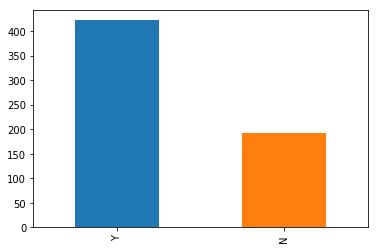

In [8]:
train['Loan_Status'].value_counts().plot.bar()

## Categorical features (Gender, Married, Self_Employed, Credit_History, Loan_Status)

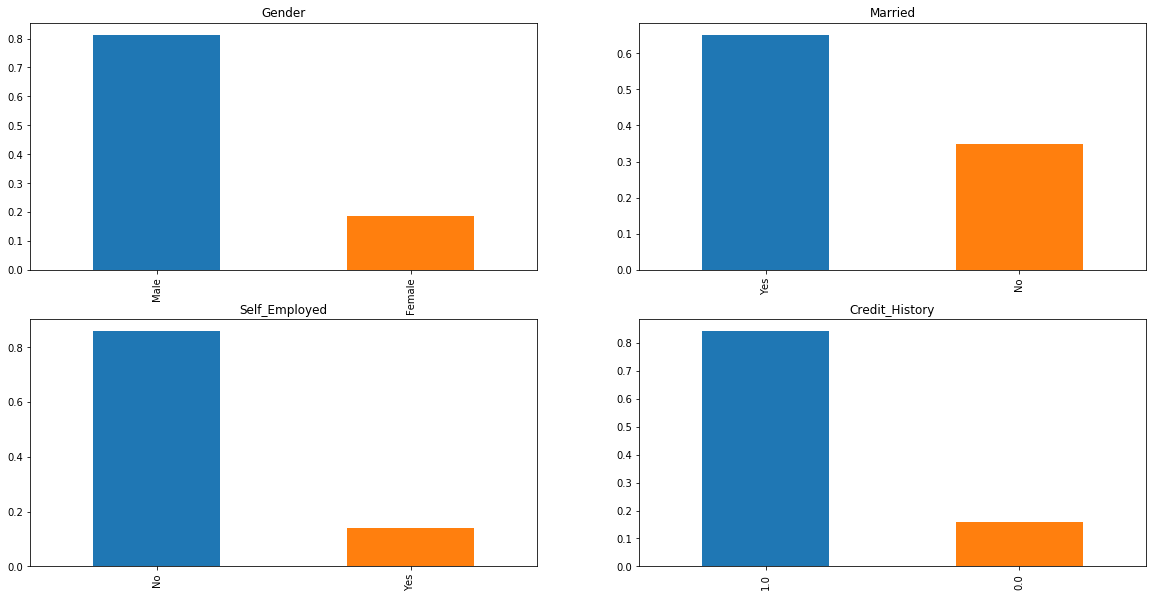

In [9]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

#####    80% applicants in the dataset are male.
#####   Around 65% of the applicants in the dataset are married.
#####    Around 15% applicants in the dataset are self employed.
#####    Around 85% applicants have repaid their debts.


## Ordinal features (Dependents, Education, Property_Area)

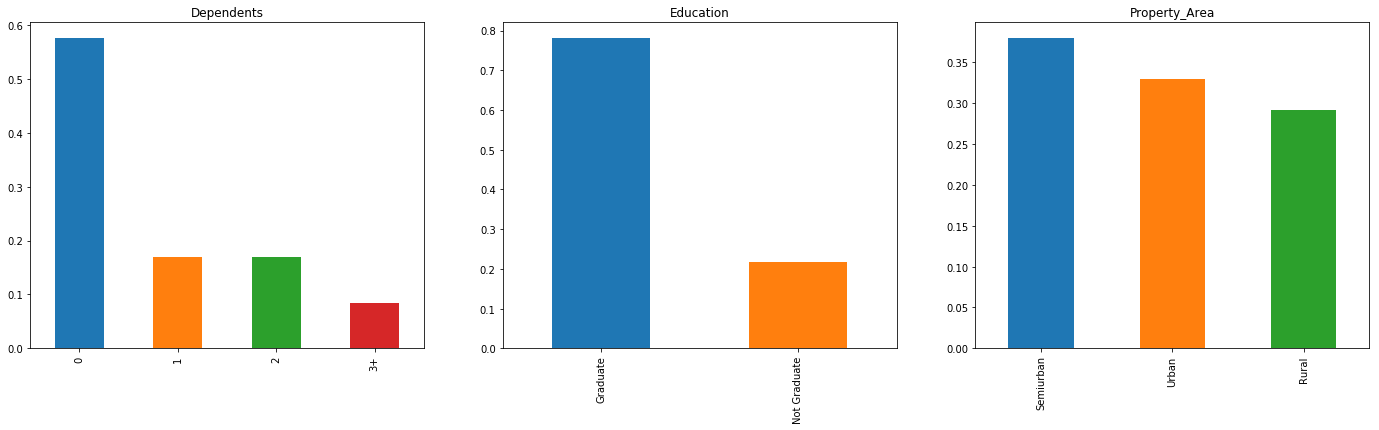

In [10]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

####     Most of the applicants don’t have any dependents.
####     Around 80% of the applicants are Graduate.
####     Most of the applicants are from Semiurban area.


## Numerical Features ( ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term )

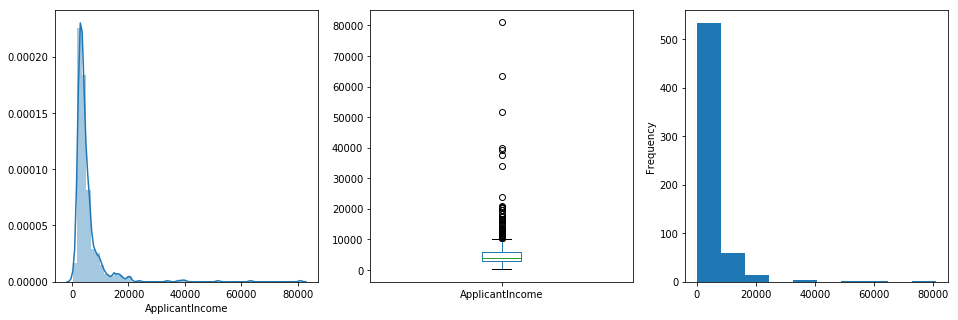

In [11]:
#Applicant Income

plt.figure(1)
plt.subplot(131)
sns.distplot(train['ApplicantIncome'])

plt.subplot(132)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.subplot(133)
train['ApplicantIncome'].plot.hist()

#### There's a right tailed skewness in the applicant income. 

Text(0.5,0.98,'')

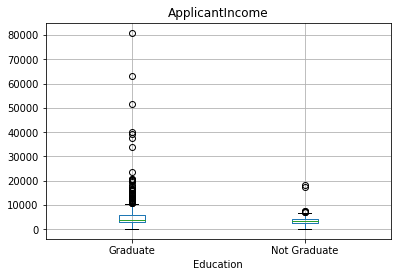

In [12]:
# Analysis of the disparity of AppIncome by education levels

train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

#### All the higher income outliers are coming from graduates

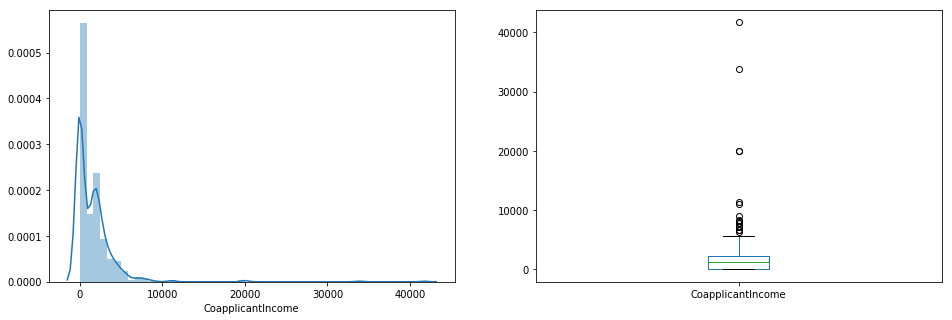

In [13]:
# Coapplicant dist
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

#### Coapplicant income also has a right tailed skewness & majority of the inomes ranges from 0 to 5000

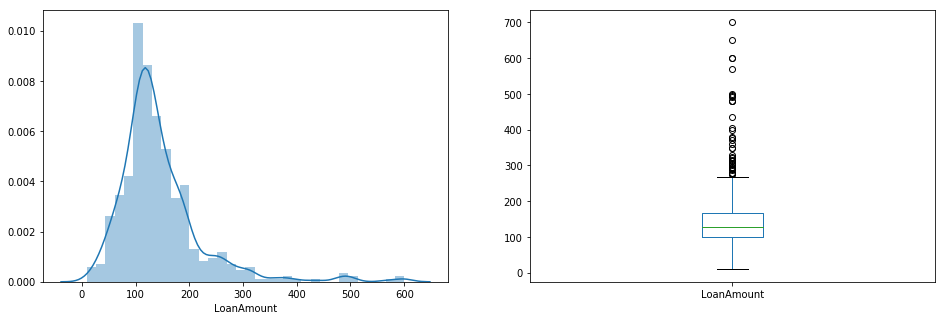

In [14]:
# loan amount distribution

plt.figure(1)
plt.subplot(121)
# Dropping the null values as for plotting
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

#### Loan amount distribution is somewhat normal but still has a lot of outliers

# Bivariate analysis


In [15]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [16]:
Gender.sum(1)

Gender
Female    112
Male      489
dtype: int64

In [17]:
#Divides each element of the row by the sum of that row
Gender.div(Gender.sum(1), axis = 0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


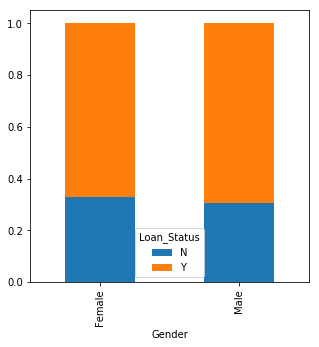

In [18]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(5,5))

#### So, it can be said that the approval of loan is gender neutral

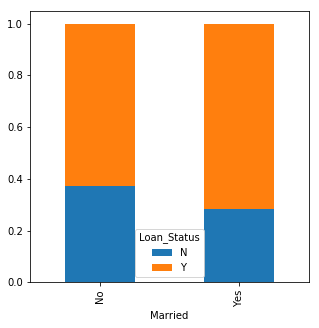

In [19]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,5))

#### Married applicants have around 10% more chance for the approval of loan

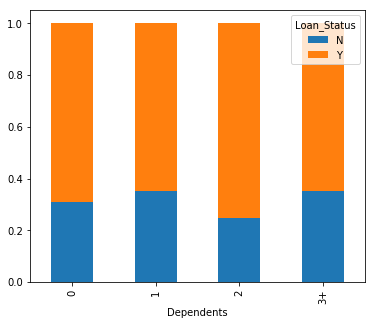

In [20]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,5))

#### 1 & 3+ dependents almost have the same disapproval rate of loan

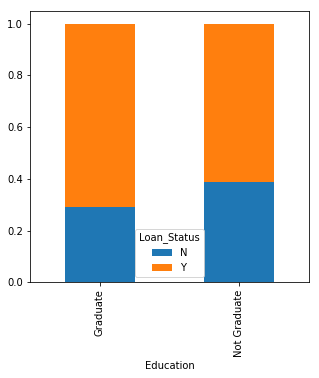

In [21]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,5))

#### Graduates have a higher chance of loan approval

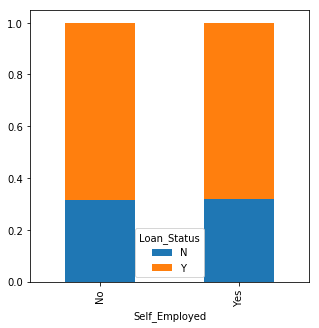

In [22]:
Self_Emp = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Emp.div(Self_Emp.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(5,5))

#### Self Employment doesn't a play a role in this case

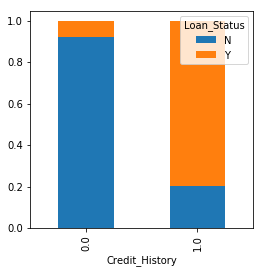

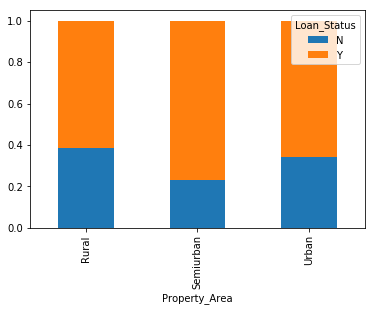

In [23]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

####    It seems people with credit history as 1 are more likely to get their loans approved.
####    Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.


In [24]:
#train = train.drop(['Income_bin'],axis=1)

In [25]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

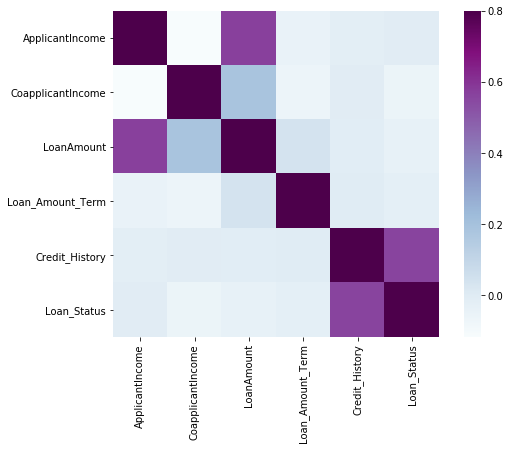

In [26]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

# Imputation of missing values

In [27]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

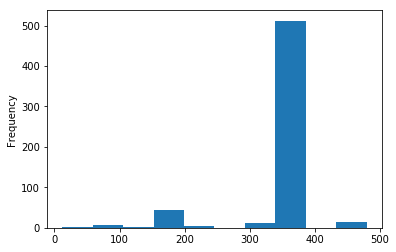

In [29]:
train['Loan_Amount_Term'].plot.hist()

In [30]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

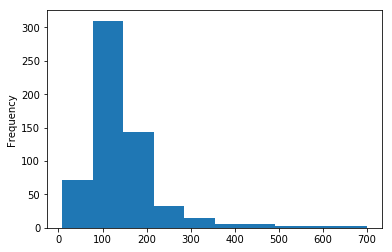

In [31]:
train['LoanAmount'].plot.hist()

In [32]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [33]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature Engineering

In [34]:
train=train.drop('Loan_ID',axis=1)
#Separating target variable
X = train.drop('Loan_Status',1)
y = train.Loan_Status

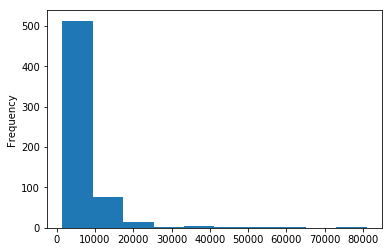

In [35]:
#Total Income
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
train['Total_Income'].plot.hist()

In [36]:
train['EMI']=(train['LoanAmount']/train['Loan_Amount_Term'])*1000

In [37]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
X = X.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [38]:
#As we need numerical values in features we'll generate dummy variables
X=pd.get_dummies(X)
train=pd.get_dummies(train)
train.shape
X.head()

,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


# Model Building
# Logistic Regression

In [39]:
#Splitting train dataset for validation with 30% of test data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [40]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
pred_test = model.predict(x_test)

In [42]:
accuracy_score(y_test,pred_test)

0.7891891891891892

In [43]:
cm = confusion_matrix(y_test,pred_test)

TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

sensitivity_score = TP/(TP+FN)
specificity_score = TN/(TN+FP)

print("Accuracy = ", accuracy_score(y_test, pred_test)*100, "%")
print("Sensitivity = ", sensitivity_score*100, "%")
print("Specificity = ", specificity_score*100, "%")

Accuracy =  78.91891891891892 %
Sensitivity =  98.4375 %
Specificity =  35.08771929824561 %


# Decision tree

In [73]:
decisionTreeClassifier = tree.DecisionTreeClassifier(criterion="entropy")
dTree = decisionTreeClassifier.fit(x_train, y_train)
pred_test = dTree.predict(x_test)
cm = confusion_matrix(y_test,pred_test)

TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

sensitivity_score = TP/(TP+FN)
specificity_score = TN/(TN+FP)

print("Accuracy = ", accuracy_score(y_test, pred_test)*100, "%")
print("Sensitivity = ", sensitivity_score*100, "%")
print("Specificity = ", specificity_score*100, "%")
print(accuracy_score(y_test,pred_test))

Accuracy =  77.83783783783784 %
Sensitivity =  94.53125 %
Specificity =  40.35087719298245 %
0.7783783783783784


## ROC curve

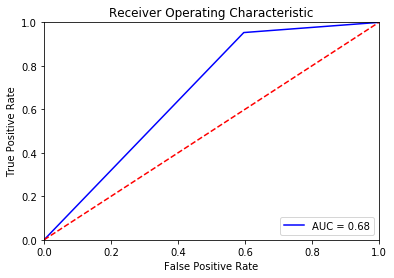

0.6783168859649122

In [45]:
fpr, tpr, _ = roc_curve(y_test, pred_test)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc